# Removing Background in an Image

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, morphology

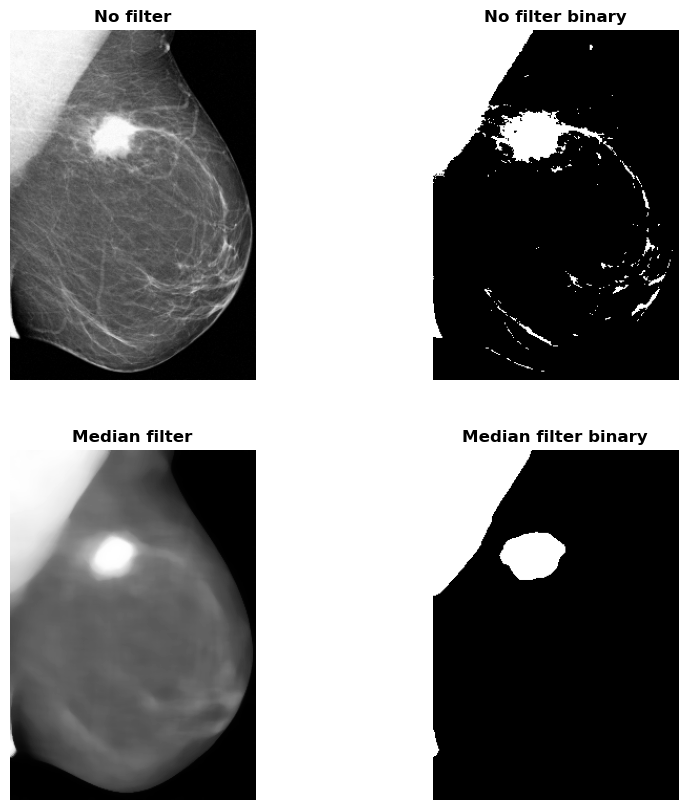

In [2]:
tumor = np.loadtxt("./images/tumorReducedSize.csv", delimiter=",", dtype=np.uint8)
_, tumor_binary = cv2.threshold(tumor, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method

tumor_med = cv2.medianBlur(tumor, ksize=15)
_, tumor_med_binary = cv2.threshold(tumor_med, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(tumor, cmap='gray')
axs[0, 0].set_title("No filter")
axs[0, 0].axis("off")
axs[0, 1].imshow(tumor_binary, cmap='gray')
axs[0, 1].set_title("No filter binary")
axs[0, 1].axis("off")
axs[1, 0].imshow(tumor_med, cmap='gray')
axs[1, 0].set_title("Median filter")
axs[1, 0].axis("off")
axs[1, 1].imshow(tumor_med_binary, cmap='gray')
axs[1, 1].set_title("Median filter binary")
axs[1, 1].axis("off")
plt.show()

To perform background subtraction, we must first define a neighborhood. We can use the np.ones() function to create a square neighborhood.

In [11]:
neighborhood = np.ones((30, 30))

The Top-hat transform removes uneven background illumination when the background is darker than the foreground.

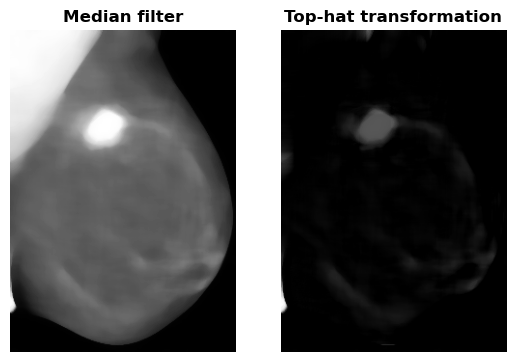

In [13]:
tumor_med_TopHat = cv2.morphologyEx(tumor_med, cv2.MORPH_TOPHAT, neighborhood) # https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f

fig, axs = plt.subplots(1, 2)
axs[0].imshow(tumor_med, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Median filter')
axs[1].imshow(tumor_med_TopHat, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Top-hat transformation')
plt.show()

The skin that shows up in the upper left has been removed.

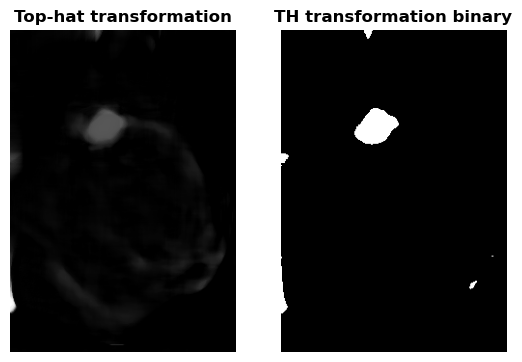

In [14]:
_, tumor_med_TopHat_binary = cv2.threshold(tumor_med_TopHat, 127, 255, cv2.THRESH_OTSU) # https://en.wikipedia.org/wiki/Otsu%27s_method

fig, axs = plt.subplots(1, 2)
axs[0].imshow(tumor_med_TopHat, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Top-hat transformation')
axs[1].imshow(tumor_med_TopHat_binary, cmap='gray')
axs[1].axis('off')
axs[1].set_title('TH transformation binary')
plt.show()